<a href="https://colab.research.google.com/github/sh639/sh639/blob/main/capstone_simplilearn_project_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.  Perform preliminary data inspection and report the findings as --
# -- the structure of the data, missing values, duplicates, etc.

# 2.  Based on the findings from the previous questions, identify duplicates and remove them

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Raw_data = pd.read_excel("data.xlsx")

In [ ]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [ ]:
# Altered column names
Raw_data.columns = Raw_data.columns.str.replace(" ","_") 
Raw_data.head(20)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
5,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",300000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,458
6,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,300000,Indonesian Rupiah(IDR),No,No,3,3.7,Yellow,Good,155
7,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",250000,Indonesian Rupiah(IDR),No,No,3,4.0,Green,Very Good,1159
8,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",250000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,259
9,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,1662


In [ ]:
Raw_data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes'],
      dtype='object')

In [ ]:
# Feature that contains value as 0, in some conditions it may null but not Everytime
(Raw_data == 0 ).sum()

Restaurant_ID              0
Restaurant_Name            0
Country_Code               0
City                       0
Address                    0
Locality                   0
Locality_Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average_Cost_for_two      18
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Price_range                0
Aggregate_rating        2148
Rating_color               0
Rating_text                0
Votes                   1094
dtype: int64

# Finding duplications

In [ ]:
# No duplications in rows and columns
# --- if duplicates present use df.drop_duplicates(keep = False and 
#    keep = True will delete last column, it will not delete the first column)
print("Duplicate if any :",Raw_data.duplicated().any())
print("Duplicated no of rows :",Raw_data.duplicated().sum())

Duplicate if any : False
Duplicated no of rows : 0


In [ ]:
# Treatment for the NA values

In [ ]:
Raw_data.isna().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
dtype: int64

In [ ]:
Raw_data['Restaurant_Name'].isna().sum()

1

In [ ]:
Raw_data['Restaurant_Name'].fillna((0),inplace=True)
Raw_data['Restaurant_Name'].isna().sum()

0

In [ ]:
Raw_data['Cuisines'].isnull().sum()

9

In [ ]:
Raw_data['Cuisines'].fillna(("Others"),inplace = True)

In [ ]:
Raw_data['Cuisines'].isnull().sum()

0

In [ ]:
print("Number of Restaurant ID :",Raw_data['Restaurant_ID'].nunique())
print("Number of Restaurant Names:",Raw_data['Restaurant_Name'].nunique())

Number of Restaurant ID : 9551
Number of Restaurant Names: 7446


# Exploratory data Analysis: EDA Phase- I
Explore the geographical distribution of the restaurants

In [ ]:
Raw_country = pd.read_excel("Country-Code.xlsx")

In [ ]:
Raw_country.columns = Raw_country.columns.str.replace(' ','_')

In [ ]:
Raw_country.head(20)

,Country_Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [ ]:
Combined_data = pd.merge(Raw_data,Raw_country,how='inner')

# Maximum and Minimum restaurant in the cities

In [ ]:
Combined_data.groupby(['City']).size().sort_values()

City
Ojo Caliente         1
Clatskanie           1
Cochrane             1
Phillip Island       1
Potrero              1
                  ... 
Ghaziabad           25
Faridabad          251
Noida             1080
Gurgaon           1118
New Delhi         5473
Length: 141, dtype: int64

<AxesSubplot:xlabel='City'>

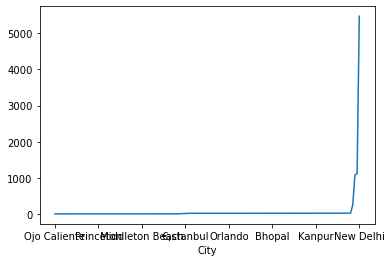

In [ ]:
Combined_data.groupby(['City']).size().sort_values().plot()

<AxesSubplot:xlabel='Country'>

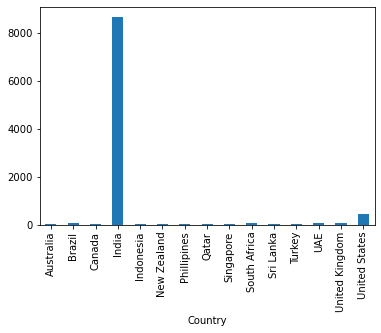

In [ ]:
Combined_data.groupby(['Country']).size().plot.bar()

In [ ]:
Combined_data.groupby(['Restaurant_Name','City']).size().sort_values()

Restaurant_Name      City     
0                    Ahmedabad     1
Paul's Homemade      New Delhi     1
Patna Roll Center    New Delhi     1
Patiala Shahi Soups  New Delhi     1
Patiala Shahi        New Delhi     1
                                  ..
McDonald's           New Delhi    33
Green Chick Chop     New Delhi    37
Subway               New Delhi    38
Domino's Pizza       New Delhi    55
Cafe Coffee Day      New Delhi    57
Length: 7974, dtype: int64

Text(0.5, 1.0, 'Resturants provide table booking facility')

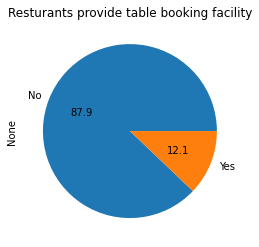

In [ ]:
table_booking = Combined_data.groupby('Has_Table_booking').size()
pie = table_booking.plot.pie(autopct = '%.1f')
pie.set_title('Resturants provide table booking facility')

Text(0.5, 1.0, 'Percentage of Restaurants provide Online delivery')

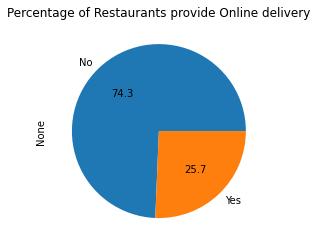

In [ ]:
calculate_percentage = Combined_data.groupby(['Has_Online_delivery']).size()
percentage = 100*calculate_percentage/9551
chart_view = percentage.plot.pie(autopct='%.1f')
chart_view.set_title('Percentage of Restaurants provide Online delivery')

In [ ]:
has_online = Combined_data.loc[Combined_data['Has_Online_delivery'] == "Yes",'Votes'].count()
no_online = Combined_data.loc[Combined_data['Has_Online_delivery'] == "No",'Votes'].count()


In [ ]:
print("Restaurants has Online delivery Facility : ",has_online)
print("Restaurants has Online delivery Facility : ",no_online)

Restaurants has Online delivery Facility :  2451
Restaurants has Online delivery Facility :  7100


In [ ]:
Difference = no_online-has_online
print("Difference between Online Facility :",Difference)

Difference between Online Facility : 4649


# EDA Phase-II

In [ ]:
Top_10 = Combined_data.groupby(["City","Cuisines"]).size().sort_values(ascending = False)


In [ ]:
Top_10.head(10)

City       Cuisines                      
New Delhi  North Indian                      658
           North Indian, Chinese             284
           Fast Food                         242
           Chinese                           228
           North Indian, Mughlai             207
           Cafe                              158
           Street Food                       123
           Bakery                            122
           North Indian, Mughlai, Chinese    120
           Bakery, Desserts                  117
dtype: int64

In [ ]:
Maximum_cuisines = Combined_data.groupby(['Cuisines','Restaurant_Name']).size().sort_values()
Maximum_cuisines = Maximum_cuisines[-1:]
print("Maximum served cuisines in Restaurant is :",Maximum_cuisines)

Maximum served cuisines in Restaurant is : Cuisines  Restaurant_Name
Cafe      Cafe Coffee Day    83
dtype: int64


In [ ]:
Minimum_cuisines = Combined_data.groupby(['Cuisines','Restaurant_Name']).size().sort_values()
Minimum_cuisines = Minimum_cuisines[:1]
print("Minimum served cuisines in Restaurant is ",Minimum_cuisines)

Minimum served cuisines in Restaurant is  Cuisines  Restaurant_Name
Afghani   Afghan Indian      1
dtype: int64


In [ ]:
most = Combined_data.groupby(['Cuisines','Restaurant_Name','City']).size().sort_values(ascending=False)
most[:1]

Cuisines  Restaurant_Name  City     
Cafe      Cafe Coffee Day  New Delhi    57
dtype: int64

<AxesSubplot:xlabel='Restaurant_Name,Average_Cost_for_two'>

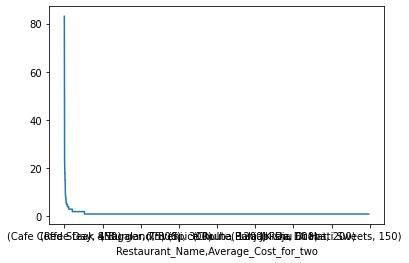

In [ ]:
Distribution_cost = Combined_data.groupby(['Restaurant_Name','Average_Cost_for_two']).size().sort_values(ascending=False)
Distribution_cost.plot()

In [ ]:
Combined_data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [ ]:
# Results between 2 to 3 ratings
distribution = Combined_data.loc[Combined_data.Aggregate_rating.between(2,3) ,['Cuisines','Aggregate_rating']]
distribution

,Cuisines,Aggregate_rating
72,Continental,2.9
114,Finger Food,2.7
139,"European, Sushi, Italian",3.0
144,"Asian, Continental, Italian, North Indian",3.0
147,"North Indian, Chinese",2.5
...,...,...
9092,"Coffee and Tea, Modern Australian",2.4
9104,Asian,2.9
9338,"Burger, German, Sandwich",2.2
9492,"Breakfast, Burger",2.4


In [ ]:
distributions = Combined_data.loc[Combined_data.Aggregate_rating > 1,['Cuisines','Aggregate_rating']]
distributions.describe()

,Aggregate_rating
count,7403.000000
mean,3.440024
std,0.552195
min,1.800000
25%,3.000000
50%,3.400000
75%,3.800000
max,4.900000


In [ ]:
desired = Combined_data.groupby(['Cuisines','Average_Cost_for_two','Price_range']).size()
final=desired.to_frame()

In [ ]:
final

0
Cuisines                        Average_Cost_for_two Price_range   
Afghani                         300                  1            1
                                500                  2            1
                                550                  2            1
                                700                  2            1
Afghani, Mughlai, Chinese       500                  2            1
...                                                              ..
Western, Asian, Cafe            250000               3            1
Western, Fusion, Fast Food      60                   4            1
World Cuisine                   80                   3            1
World Cuisine, Mexican, Italian 150                  4            1
World Cuisine, Patisserie, Cafe 105                  3            1

[3660 rows x 1 columns]

In [ ]:
Combined_data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

,Aggregate_rating,Average_Cost_for_two
Aggregate_rating,1.000000,0.051792
Average_Cost_for_two,0.051792,1.000000


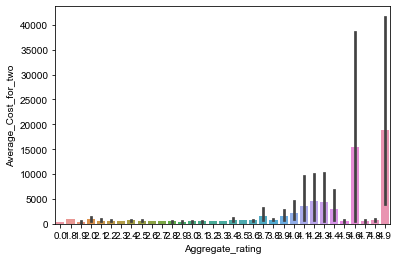

In [ ]:
sns.barplot(x="Aggregate_rating",y="Average_Cost_for_two",data=Combined_data)
sns.set(rc={'figure.figsize':(25,10)})
Combined_data[["Aggregate_rating","Average_Cost_for_two"]].corr()

C:\Users\Shakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Has_Online_delivery', ylabel='Aggregate_rating'>

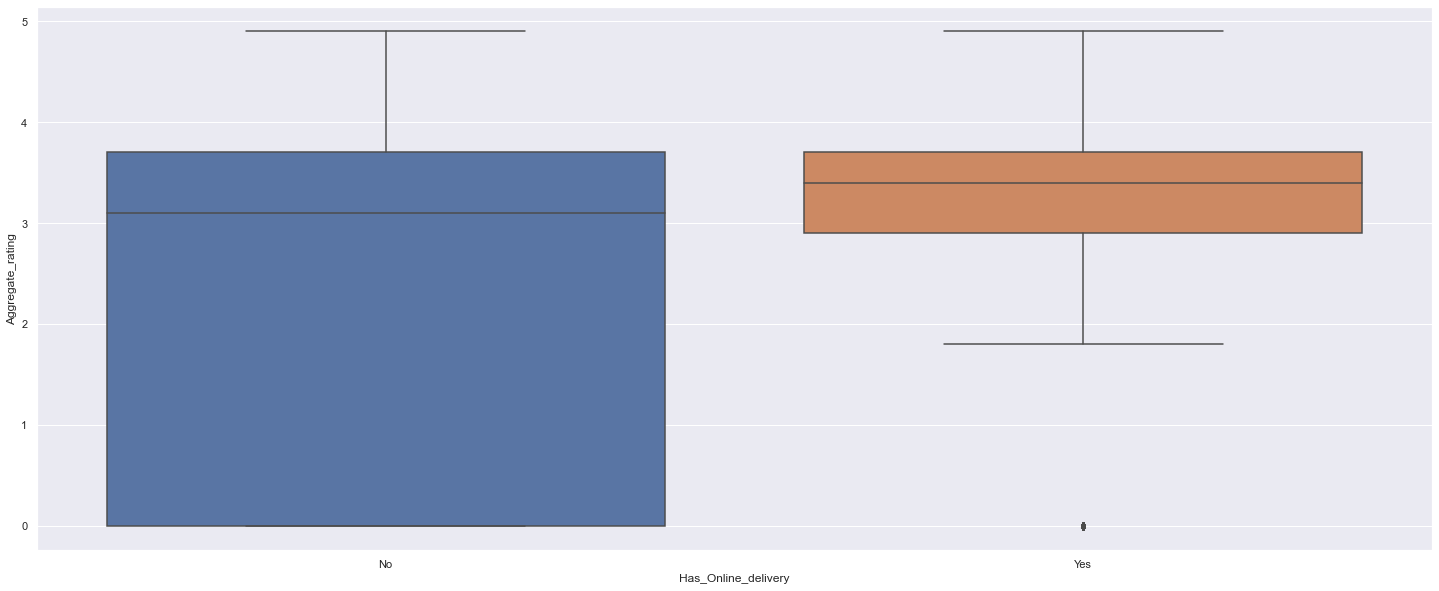

In [ ]:
sns.boxplot("Has_Online_delivery","Aggregate_rating", data = Combined_data)

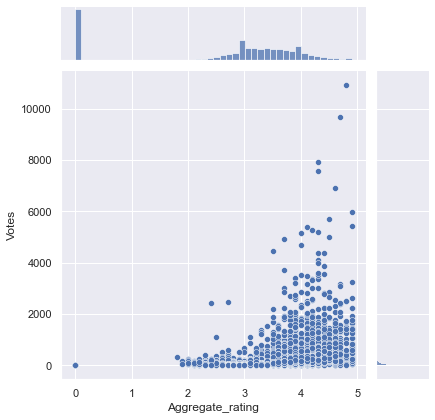

In [ ]:
sns.jointplot(x='Aggregate_rating',y='Votes',data =Combined_data)